In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
%matplotlib inline

In [3]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.
/home/genrikh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Text(0.5,0,'Price')

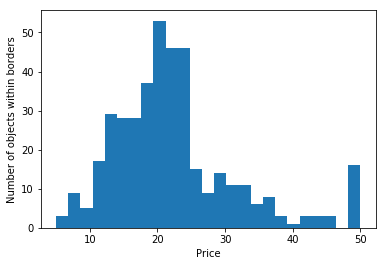

In [4]:
plt.hist(y_train, bins=25)
plt.ylabel('Number of objects within borders')
plt.xlabel('Price')

# Задание.
Будем решать задачу регрессии. Целевая переменная -- цена дома, признаки - различная информация о домохозяйстве. Для решения будем использовать линейную регрессию. Задача - оценить качество решения в зависимости от количества объектов в обучающей выборке. Качество решения будем оценивать с помощью среднеквадратичной и среднеабсолютной ошибки, а так же коэффициента детерминации $r^2$. Также требуется оценить дисперсию данных функционалов в зависимости от числа объектов в обучающей выборке.

Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого размера выборки стоит повторять многократно на различных случайных подвыборках.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

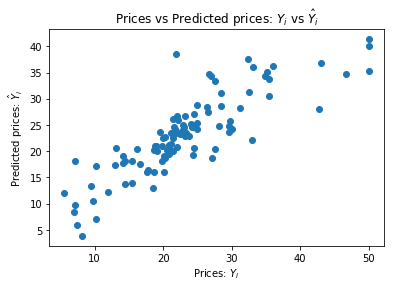

In [6]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [7]:
print('mae = {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse = {}'.format(mean_squared_error(y_test, y_pred)))
print('prediction variance = {}'.format(np.std((y_test - y_pred)**2)))

mae = 3.464185812406728
mse = 23.19559925642313
prediction variance = 45.7804868503376


In [8]:
len(X_train)

404

In [9]:
len(X_train[0])

13

In [10]:
type(X_train)

numpy.ndarray

In [11]:
def getPart(arr, length):
    return arr[np.random.choice(arr.shape[0], length, replace=False)]
    

In [12]:
X_train_part = getPart(X_train, 5)

In [13]:
print(len(X_train_part))

5


In [14]:
mae = []
mse = []
pred_var = []
x = range(len(X_train))
num = 100 # кол-во прогонов

In [15]:
for length in range(1, len(X_train) + 1):
    cur_mae = 0
    cur_mse = 0
    cur_pred_var = 0
    for j in range(num):
        X_train_part = getPart(X_train, length)
        y_train_part = getPart(y_train, length)
        lm.fit(X_train_part, y_train_part)
        y_pred = lm.predict(X_test)
        cur_mae += mean_absolute_error(y_test, y_pred)
        cur_mse += mean_squared_error(y_test, y_pred)
        cur_pred_var += np.std((y_test - y_pred)**2)
    mae.append(cur_mae/num)
    mse.append(cur_mse/num)
    pred_var.append(cur_pred_var/num)    

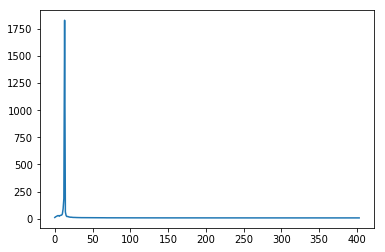

In [16]:
plt.plot(x, mae)

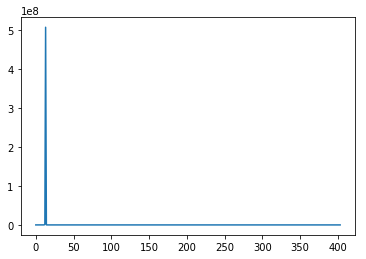

In [17]:
plt.plot(x, mse)

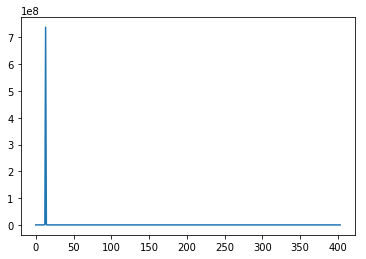

In [18]:
plt.plot(x, pred_var)

In [19]:
max_mae = max(mae)
max_mse = max(mse)

In [20]:
for i in range(len(mse)):
    mae[i] = mae[i] / max_mae
    mse[i] = mse[i] / max_mse
    

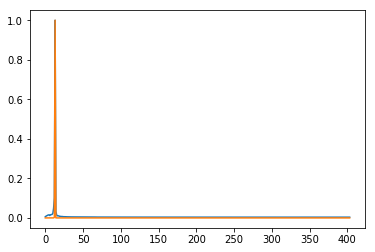

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x, mae)
ax1.plot(x, mse)



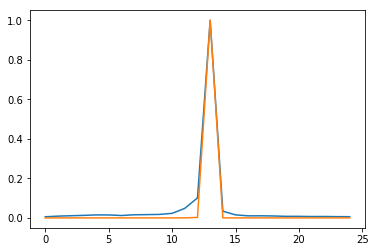

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x[:25], mae[:25])
ax1.plot(x[:25], mse[:25])


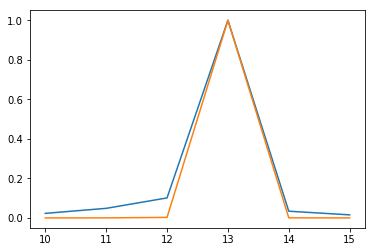

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x[10:16], mae[10:16])
ax1.plot(x[10:16], mse[10:16])


Максимумы ошибок

In [24]:
print("mae_idx =", mae.index(max(mae)))
print("mse_idx =", mse.index(max(mse)))


mae_idx = 13
mse_idx = 13


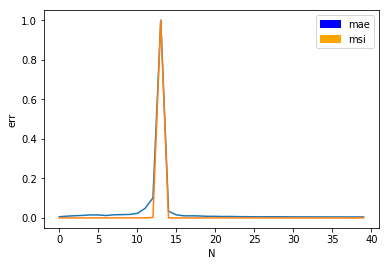

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x[:40], mae[:40])
ax1.plot(x[:40], mse[:40])
plt.xlabel('N')
plt.ylabel('err')
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='blue', label='mae')
blue_patch = mpatches.Patch(color='orange', label='msi')
plt.legend(handles=[red_patch, blue_patch])